# The Calculation of Pi

*David Fraser from Hexagon @ UCT Mathematics Day, 3.14 2020*

## Outline

Before we begin, let me give you a brief outline of this talk:

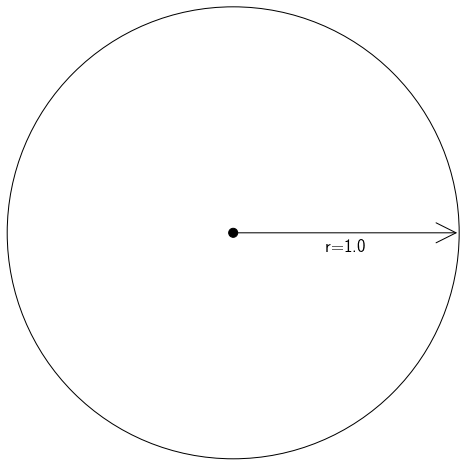

In [1]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Arc, FancyArrowPatch, Circle, RegularPolygon
import math
from math import pi, sqrt, cos, sin, tan
from fractions import Fraction
import decimal
from IPython.display import display, HTML, Math
import tabulate
from jupyter_plot_helpers import *
fig, ax = setup_plot()
base_circle(ax)

* Yes, this is an outline of a circle, with Pi written in the middle
* The talk today will cover calculating PI in various ways, roughly in historical order
* There's far too much information to give a comprehensive overview in 40 minutes
* Fortunately Professor Webb has already covered a lot of the history of human knowledge of π
* We're going to do a tour of some different ways to calculate Pi, and how easy there are by hand or by computer
* We'll start out with Hand-calculating Pi, using Polygons and Pythagoras, and talk about what Archimedes did
* Then we'll look at Infinite Series, and how fast they converge
* We'll have a look at different number systems with different bases, and using computers to calculate Pi
* And we'll look at some interesting algorithms called Spigot algorithms
* Finally we'll finish off with how to calculate Pi using a coffee mug
* You don't have to follow every step of the maths to enjoy this - hopefully this will show you some new and interesting ideas, which you can explore later on your own
* All of the material for this talk is available on the web at [bit.ly/uctpi2020](https://bit.ly/uctpi2020), so you can get hold of it there - don't look at it now, but you can go back later if you're interested in any of the details
* All of the diagrams for this talk, and all the different estimates of pi were drawn and calculated using computer programs that are included in a document on that web page, so you can have a look at them and check them

## Calculating Pi by Hand

### Estimating Pi Using a Compass and String
* You can try estimate Pi by measuring your way around a circle with a piece of string
* This turns out not to give very reliable estimates for PI. I got a distance of 31.7cm around a circle with a diameter of 10cm - not bad, but only correct to one decimal place
$$\pi \approx \frac{31.7cm}{10.0cm} = 3.17$$

### Using Polygons to Approximate Pi
* But to get a mathematically rigorous measurement is harder. One way is to start with a similar shape that you *can* measure,
  and then see how to get from that measurement closer towards Pi. 
* The simplest shapes are polygons, and the simplest polygon is a triangle - so we could use one of those - but it's obvious that this would be quite far off
* Or we could use squares. We could fit one square inside the circle - then the distance around the square would be less than the distance around the circle. And another around the outside - so that the distance around that square would be greater than the distance around the circle. Like so:


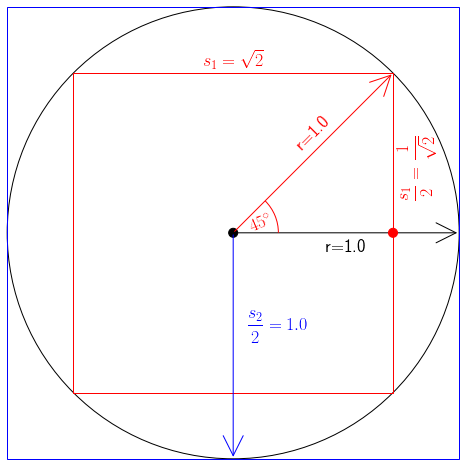

In [2]:
sqrt2 = sqrt(2)

fig, ax = setup_plot()
add = lambda artist: ax.add_artist(artist)
base_circle(ax)

inscribed_square = add(RegularPolygon((0,0), 4, 1.0, fill=False, clip_on=False, color='r', orientation=pi/4))
inscribed_radius = add(FancyArrowPatch((0, 0), (1/sqrt2, 1/sqrt2), clip_on=False, color='r', mutation_scale=50, arrowstyle='->'))
inscribed_radius_label = plt.text(1/sqrt2/2, 1/sqrt2/2, "r=1.0", color='r', rotation=45, **std_kwargs.text)
inscribed_side_label = plt.text(0, 1/sqrt2, r"$$s_{1}=\sqrt{2}$$", color='r', **std_kwargs.text)
inscribed_angle = add(Arc((0.0, 0.0), 0.4, 0.4, 0, 0, 45, color='r'))
inscribed_angle_label = plt.text(0.12, -0.01, r"$$45^{\circ}$$", rotation=45/2, color='r', **std_kwargs.text)
inscribed_intersection = add(Circle((1/sqrt2, 0), 0.02, fill=True, clip_on=False, color='r'))
inscribed_half_side_label = plt.text(1/sqrt2+0.11, (1/sqrt2)/5, r"$$\frac{s_{1}}{2} = \frac{1}{\sqrt{2}}$$", color='r', rotation=90, **std_kwargs.text)

circumscribed_square = add(RegularPolygon((0,0), 4, sqrt2, fill=False, clip_on=False, color='b', orientation=pi/4))
circumscribed_radius = add(FancyArrowPatch((0.0, 0.0), (0.0, -1.0), clip_on=False, color='b', arrowstyle='->', mutation_scale=50))
circumscribed_radius_label = plt.text(0.2, -0.5, r"$$\frac{s_{2}}{2}=1.0$$", color='b', **std_kwargs.text)

plt.show()

* We know that each arc of the circle must be longer than the *inscribed* square because a straight line is the shortest distance between two points. How do we know that the *circumscribed* square has a greater perimeter? This seems intuitively obvious, but that's not a proof - that's left as an exercise for the reader/listener...
* By using Pythagoras's theorem and some simple geometry we can calculate an *upper bound* and a *lower bound* for pi:

In [3]:
display(Math(r"4 s_{1} < 2 \pi < 4 s_{2}"))
display(Math(r"2 \sqrt{2} < \pi < 4"))
display(Math(r"%0.6f < \pi < 4" % (2 * sqrt(2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Obviously the more sides we add, the closer we will get to the true value of Pi. Another nice simple polygon to use is the Hexagon - and not just because I work for a company with that name. Hexagons turn out to have quite easily-measurable sides, whether they're inscribed in the circle or circumscribed around it


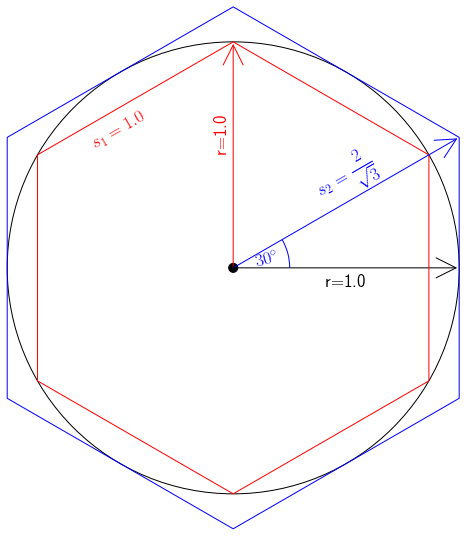

In [4]:
fig, ax = setup_plot()
add = lambda artist: ax.add_artist(artist)

base_circle(ax)

inscribed_hexagon = add(RegularPolygon((0,0), 6, 1.0, fill=False, clip_on=False, color='r'))
inscribed_radius = add(FancyArrowPatch((0, 0), (0, 1), clip_on=False, color='r', mutation_scale=50, arrowstyle='->'))
inscribed_radius_label = plt.text(-0.05, 0.5, "r=1.0", color='r', rotation=90, **std_kwargs.text)
inscribed_side_label = plt.text(-0.5, 0.5, r"$$s_{1}=1.0$$", color='r', rotation=30, **std_kwargs.text)

circumscribed_hexagon = add(RegularPolygon((0,0), 6, 2/sqrt(3), fill=False, clip_on=False, color='b'))
circumscribed_radius = add(FancyArrowPatch((0.0, 0.0), (1.0, 1/sqrt(3)), clip_on=False, color='b', arrowstyle='->', mutation_scale=50))
circumscribed_radius_label = plt.text(0.5, 0.25, r"$$s_{2}=\frac{2}{\sqrt{3}}$$", color='b', rotation=30, **std_kwargs.text)
circumscribed_angle = add(Arc((0.0, 0.0), 0.5, 0.5, 0, 0, 30, color='b'))
circumscribed_angle_label = plt.text(0.15, -0.01, r"$$30^{\circ}$$", rotation=30/2, color='b', **std_kwargs.text)

plt.show()

In [5]:
display(Math(r"6 s_{1} < 2 \pi < 6 s_{2}"))
display(Math(r"3 < \pi < 2\sqrt{3}"))
display(Math(r"3 < \pi < %0.6f" % (2 * math.sqrt(3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Archimedes and polygons

* Archimedes, a Greek mathematician, was the first to do use this idea with a polygon with a large number of sides. 
* He started with a hexagon, then repeatedly doubled the number of sides
* You can use Pythagoras to work out the lengths of the sides in a similar way to what we did above - it's just more work each time
* He continued until he ended with a 96-sided polygon (called an *enneacontahexagon* if you need a word for it...)
* He did this in around 250BC, without having the advantage of calculators and computers to calculate things
* He showed that Pi was between two fractions - you may be familiar with 22 over 7 as an estimate for Pi:

In [6]:
display(Math(r"$$\frac{223}{71} < \pi < \frac{22}{7}$$"))
display(Math(r"~%0.6f < \pi < ~%0.6f" % (223/71., 22/7.)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Doubling the sides of squares

* So let's imitate how Archimedes approached this, and use Pythagoras. Instead of starting with a hexagon like he did, I'm starting with a square
* If you start with a square and double the number of sides repeatedly, we can use Pythagoras's theorem to calculate the lengths of the sides generated
* Not surprisingly, we end up with a lot of nested square root functions
* Let's do this repeatedly...

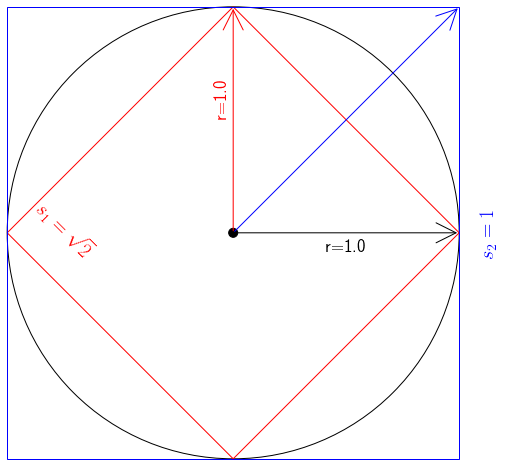

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

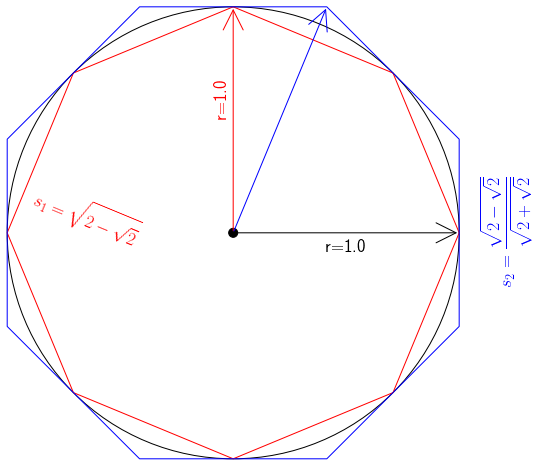

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

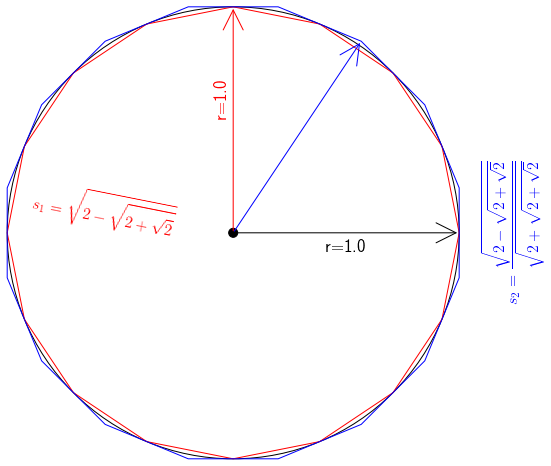

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

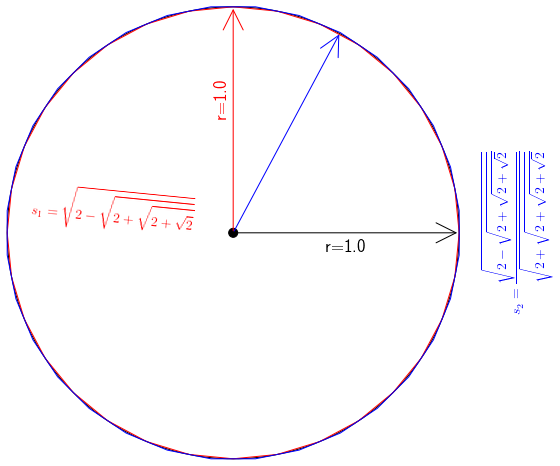

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

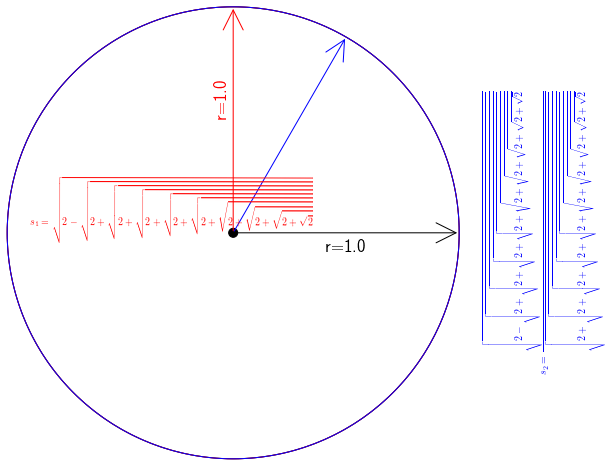

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import FancyArrowPatch, Circle, RegularPolygon
from math import cos, pi, sqrt, tan
from jupyter_plot_helpers import *

from IPython.display import display, Math

sqrt2 = sqrt(2)

sqrt_based_table = []
for log2_sides in [2,3,4,5,11]:
    sides = 2 ** log2_sides
    fig, ax = setup_plot()
    add = lambda artist: ax.add_artist(artist)
    base_circle(ax)
    inscribed_polygon = add(RegularPolygon((0,0), sides, 1.0, fill=False, clip_on=False, color='r'))
    inscribed_radius = add(FancyArrowPatch((0, 0), (0, 1), clip_on=False, color='r', mutation_scale=50, arrowstyle='->'))
    inscribed_radius_label = plt.text(-0.05, 0.5, "r=1.0", color='r', rotation=90, **std_kwargs.text)
    circumscribed_r = 1/math.cos(math.pi/sides)
    circumscribed_polygon = add(RegularPolygon((0,0), sides, circumscribed_r, fill=False, clip_on=False, orientation=math.pi/sides, color='b'))
    how_many = int(30/(360/sides))+1
    angle = math.pi/2+math.pi/sides-how_many*2*math.pi/sides
    radius_x, radius_y = math.cos(angle)*circumscribed_r, math.sin(angle)*circumscribed_r
    circumscribed_radius = add(FancyArrowPatch((0.0, 0.0), (radius_x, radius_y), clip_on=False, color='b', arrowstyle='->', mutation_scale=50))
    half_sides = sides // 2
    if log2_sides == 2:
        cos_expr = "0"
        sin_expr = "1"
        circumscribed_side_expr = "1"
    else:
        cos_expr = "+".join([r"\sqrt{2" for n in range(2, log2_sides)])+("}"*(log2_sides-2))
        cos2_expr = "+".join([r"\sqrt{2" for n in range(2, log2_sides+1)])+("}"*(log2_sides+1-2))
        sin2_expr  = cos2_expr.replace("+", "-", 1)
        circumscribed_side_expr = r"\frac{%s}{%s}" % (sin2_expr, cos2_expr)
    inscribed_side_expr = r"\sqrt{2%s}" % ("-"+cos_expr if cos_expr != "0" else "")
    # calculate actual lengths
    cos_value, sin_value = 0, 1
    for n in range(2, log2_sides):
        cos_value = sqrt(2+cos_value)
    circumscribed_side_length = sqrt(2-cos_value)/sqrt(2+cos_value)
    cos_value /= 2
    inscribed_side_length = 1 / 2 * sqrt(2-2*cos_value)
    text_format = {'ha': 'left', 'va': 'center', 'fontsize': max(24-log2_sides*2, 10)}
    circumscribed_side_label = plt.text(1.1, 0, r"$$s_{2}=%s$$" % circumscribed_side_expr, color='b', rotation=90, **text_format)
    inscribed_side_label = plt.text(-1+sin_value/10, cos_value/10, r"$$s_{1}=%s$$" % inscribed_side_expr, color='r', rotation=-(180/sides), **text_format)
    plt.show()
    display(Math(r"%d s_{1} < 2 \pi < %d s_{2}" % (sides, sides)))
    display(Math(r"%s %s < \pi < %s %s" % (half_sides, inscribed_side_expr, sides, circumscribed_side_expr if sides > 4 else "")))
    half_inscribed_perimeter = sides * inscribed_side_length
    half_inscribed_circumference = sides * circumscribed_side_length
    display(Math(r"%0.6f < \pi < %0.6f" % (half_inscribed_perimeter, half_inscribed_circumference)))
    sqrt_based_table.append([log2_sides, sides, half_inscribed_perimeter, half_inscribed_circumference])

In [8]:
display(HTML(tabulate.tabulate(sqrt_based_table, tablefmt='html', floatfmt="0.6f", headers=["Exponent", "Sides", "Lower Bound", "Upper Bound"])))

Exponent,Sides,Lower Bound,Upper Bound
2,4,2.828427,4.000000
3,8,3.061467,3.313708
4,16,3.121445,3.182598
5,32,3.136548,3.151725
11,2048,3.141591,3.141595


* Now if we have an ever-increasing number of sides, these values will get increasingly close to the value of pi

## Infinite Series

* This is a slightly complex example of an *infinite series*, a way of defining an infinite sequence of numbers
* We say that this infinite series *converges* on the value of pi - that is, you can get arbitrarily close to the value of pi just by going far enough along in the sequence
* We can even write try and this in mathematical terms as follows, where there are *n* 2s nested in square root signs *after* the minus:

$$\pi = \lim_{n->\infty}{2^{n+1}\sqrt{2-\sqrt{2+\sqrt{2+\sqrt{2+...}}}}}$$

* There are actually a suprisingly large number of ways to define Pi as an infinite series
* One of the first of these to be discovered is now known as the Madhava–Leibniz series. It is based on a series for the inverse tangent function discovered in around 1400 by the Indian mathematician Madhava of Sangamagrama, one of the earliest mathematicians to introduce the idea of an infinite series. It was later used by the German mathematician Liebniz, and it gives the following formula for calculated Pi:

$$\frac{\pi}{4} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots = \sum_{n=1}^\infty \frac{(-1)^{n-1}}{2n - 1}$$

* It's a beautifully simple formula - and doesn't require calculating any complicated square roots: you can calculate the first few terms in your head

In [9]:
def madhava_leibniz(n):
    msum = 0
    for i in range(1, n+1):
        msum += Fraction(-1 if (i % 2 == 0) else 1, 2*i-1)
    return 4*msum

madhava_leibniz_table = []
for n in [1,2,3,4,10,100]:
    f = madhava_leibniz(n)
    madhava_leibniz_table.append((n, r"$$\frac{%d}{%d}$$" % (f.numerator, f.denominator), float(f)))

display(HTML(tabulate.tabulate(madhava_leibniz_table, tablefmt="html")))

1,$$\frac{4}{1}$$,4
2,$$\frac{8}{3}$$,2.66667
3,$$\frac{52}{15}$$,3.46667
4,$$\frac{304}{105}$$,2.89524
10,$$\frac{44257352}{14549535}$$,3.04184
100,$$\frac{8252079759413970386664454687621174435983101115012912631997769614579677862845786070667088}{2635106162757236442495826303084698495565581115509040892412867358728390766099042109898375}$$,3.13159


* It's a lot of calculating effort to add up 100 fractions; we end up with huge numerators and denominators, and we still don't get something very accurate.
* In fact, even if you add up 2020 fractions, you still only get three decimal places of accuracy:

In [10]:
display(Math(r"\pi \approx %0.6f" % madhava_leibniz(2020)))

<IPython.core.display.Math object>

* When it comes to calculating Pi, what we'd really like is a series that makes our life easier. That tends to happen if it converges **quickly**
* Madhava actually had ways to adjust for this not being very efficient, but we won't go into them today
* And other mathematicians developed many different infinite series that could be used to calculate Pi more efficiently. One of these was Machin's formula, which is related to Madhava's series.
* Using these was very time consuming and error prone. Those of you who use modern calculators and computers, spare some thought for William Shanks. In 1874 he concluded 15 hard years of work to publish 707 decimal places of pi. However, there was an error in place 527.
* It was the Indian genius Srinivasa Ramanujan who discovered some remarkable formulae for Pi in 1914. One of them that converges very quickly looks like this:
$$\frac{1}{\pi} = \frac{2 \sqrt 2}{9801} \sum_{k=0}^\infty \frac{(4k)!(1103+26390k)}{k!^4\left(396^{4k}\right)}$$
* It looks remarkable, and it is...

In [11]:
decimal.getcontext().prec = 50
sqrt2 = decimal.Decimal(2).sqrt()
def factorial(n):
    return 1 if n <= 1 else n*factorial(n-1)

def ramanujan(n):
    rsum = 0
    for k in range(0, n):
        rsum += Fraction(factorial(4*k)*(1103+26390*k), ((factorial(k)**4) * 396**(4*k)))
    return 9801 / (2 * sqrt2 * decimal.Decimal(rsum.numerator) / decimal.Decimal(rsum.denominator))


ramanujan_table = []
for n in [1,2,3,4,5,6]:
    f = ramanujan(n)
    ramanujan_table.append((n, f))

display(HTML(tabulate.tabulate(ramanujan_table, tablefmt="html", floatfmt="0.30f")))

1,3.141592730013305523328881463385
2,3.141592653589794004176383168669
3,3.141592653589793115997963468544
4,3.141592653589793115997963468544
5,3.141592653589793115997963468544
6,3.141592653589793115997963468544


* Now something might stand out to you about the above numbers
* Firstly, the very first term of the series gives us an approximation of pi accurate to 6 decimal places
* Secondly, from the 3rd term on the values shown are the same.
* What's happening here is that I'm running into some issues with calculating numbers on a computer, that means it's only displaying up to 15 decimal places accurately
* Computers can handle numbers in a few different ways. But to understand that better, we'd better digress and talk about Bases

## Numbers and Bases

* We're used to writing numbers in decimal or base 10, using ten different symbols for each digit, and having a digit's *place value* being ten times the value of the digit immediately to the right
* There's a decimal point or comma that we use to know which digit has a place value of 1, and which digits are used for increasingly small parts of fractions
* Computers are generally built on microscopic switches that are either on or off - so to store numbers, these become the digits. They can therefore only store two possible values, and so the easiest way to handle numbers in such a system is to use base 2, or binary.
* The number written in decimal as <tt>2020<sub>10</sub></tt> is written in binary as <tt>11111100100<sub>2</sub></tt> - or <tt>2<sup>10</sup>+2<sup>9</sup>+2<sup>8</sup>+2<sup>7</sup>+2<sup>6</sup>+2<sup>5</sup>+2<sup>2</sup></tt>
* As an aside, computer numbers are also often represented in hexadecimal (base 16 - using the digits <tt>0123456789ABCDEF</tt>) because it's more compact than binary and each hexadecimal digit corresponds to 4 binary digits (or bits). <tt>2020<sub>10</sub></tt> is <tt>7E4<sub>16</sub></tt> in hexadecimal.
* But computers also need to know how much space to set aside for a number that they're working with. And that leads to a number of different schemes for storing numbers:
  - the most common way is to have an integer being represented in a fixed number of bits- usually r of 2 like 8, 16, 32 or 64
  - these can either be treated as entirely positive integers, or can also allow negative numbers - either by using a bit to indicate the sign, positive or negative, or by using a cunning invention called 2's complement which makes the electronics for doing arithmetic with positive and negative numbers easier
  - to represent a non-integer number, the most common way historically is called floating point, and is somewhat similar to scientific notation: you store the number as a fraction between 0 and 1, along with an exponent which indicates where the point really belongs. In this way you can represent a very wide variety of numbers, with about the same precision for each
  - there are also methods to have an arbitrarily large integer, where the amount of storage varies
  - and there are other ways to handle non-integers - by storing the numerator and denominator of a fraction for example
  - combining the last two ways can let you deal with arbitrarily precise fractions or decimals
* If you try and use a system with fixed precision floating point to deal with very precise computations, you can sometimes end up losing precision because you simply don't have enough bits to store the most accurate result.
* Fortunately in this case, I actually calculated the numbers using fractions and then converted to decimals with 50 digits of precision, and it was only when printing out as a human-readable string that the loss of precision happened. That can swiftly be remedied:


In [12]:
accurate_ramanujan_table = [(n, '&nbsp;{0:50f}'.format(f)) for (n, f) in ramanujan_table]
display(HTML(tabulate.tabulate(accurate_ramanujan_table, tablefmt="html")))

1,3.1415927300133056603139961890252155185995816071102
2,3.1415926535897938779989058263060130942166450293230
3,3.1415926535897932384626490657027588981566774804625
4,3.1415926535897932384626433832795552731599742104206
5,3.1415926535897932384626433832795028841976638181331
6,3.1415926535897932384626433832795028841971693993799


* the 6th term in the series here actually gives pi correctly to 47 digits, without a huge number of calculations!

## Computer Calculations

* From 1946 onwards, all records for calculating Pi have been reached electronically, and even if you're very good at mental arithmetic, you simply won't be able to beat them
* These records have advanced rapidly, through improvements to the mathematical techniques, the software, and the speed of computer hardware - which has roughly followed a prediction from Gordon Moore in the 1970s known as Moore's law: namely that the computing power of a chip would double every two years. And with those doublings, the number of digits of pi calculated has grown astronomically. These are just some of the records that have been sets over the last 70 years or so:

| Year    | Record-holder                                          | Time         | Digits of Pi       | 
| ------- | ------------------------------------------------------ | ------------ | -----------------: |
| 1949    | G W Reitwiesner et al                                  | 70 hours     | 2,037              |
| 1958    | Francois Genuys                                        | 1.7 hours    | 10,000             |
| 1961    | Daniel Shanks & John Wrensch                           | 8.7 hours    | 100,000            |
| 1973    | Hean Guilloud and M. Dichampt                          | 28 hours     | 1,001,250          |
| 1983    | Yasumasa Kanada, Sayaka Yoshino and Yoshiaki Tamura    |              | 16,777,206         |
| 1987    | Yasumasa Kanada, Yoshiaki Tamura, Yoshinobu Kubo et al |              | 134,214,700        |
| 1989    | Gregory V. Chudnovsky & David V. Chudnovsky            |              | 480,000,000        |
| 1991    | Gregory V. Chudnovsky & David V. Chudnovsky            |              | 2,260,000,000      |
| 1997    | Yasumasa Kanada and Daisuke Takahashi                  |              | 51,539,600,000     |
| 1999    | Yasumasa Kanada and Daisuke Takahashi                  |              | 206,158,430,000    |
| 2002    | Yasumasa Kanada & 9 person team (64 computing nodes)   | 600 hours    | 1,241,100,000,000  |
| 2009    | Fabrice Bellard (with home computer)                   | 131 days     | 2,699,999,990,000  |
| 2010    | Shigeru Kondo (with home computer)                     | 90 days      | 5,000,000,000,000  |
| 2011    | Shigeru Kondo (with home computer)                     | 371 days     | 10,000,000,000,050 |
| 2019    | Emma Haruka Iwao (using cloud computer)                | 121 days     | 31,415,926,535,897 |
| 2020    | Timothy Mullican (using home computers)                | 303 days     | 50,000,000,000,000 |

* You'll see some repeated names here
* The Chudnovsky brothers, who won the record in 1989, were notable for introducing a new infinite series that converges even faster than those discovered before. It looks like this:

In [13]:
display(Math(r"\frac{1}{\pi} = \frac{12}{640320^{3/2}} \sum_{k=0}^\infty \frac{(6k)! (13591409 + 545140134k)}{(3k)!(k!)^3 (-640320)^{3k}}"))

<IPython.core.display.Math object>

* One of the most challenging parts of running a calculation that calculates so many digits is where to store them - including all the temporary calculations you do on the way. So the recent limitations in speed have mostly been caused by the speed of storing and retrieving huge numbers in order to do the processing required.
* Most of the recent records have been set using this algorithm (which was developed in 1987) and using a program called y-cruncher by Alexander Yee
* If you want, you can download and run y-cruncher on your own computer at home and see how many digits you can calculate

## Spigot algorithms
* So, it's possible to calculate Pi to millions, billions or even trillions of digits using modern computers. But it takes a very long time - and you don't have the final answer until it's done
* What about those of us with less dedication and patience?
* In 1995 two different algorithms where invented that produce digits of pi one at a time, accurately.

### Wagon and Rabinowitz
* Stan Wagon and Stanley Rabinowitz produced an algorithm based on the following formula for Pi:

$$\pi = 2 + \frac{1}{3}\left( 2 + \frac{2}{5}\left( 2 + \frac{3}{7}\left( 2 + \frac{4}{9} \bigg( 2 + \dots \bigg) \right) \right) \right)$$

* Each successive fraction has *n* on the top and *2n+1* on the bottom
* We spoke about bases earlier. One way to show that Pi is (approximately) 3.1415... in decimal is to write it like this:

$$\pi = 3 + \frac{1}{10}\left( 1 + \frac{1}{10}\left( 4 + \frac{1}{10}\left( 1 + \frac{1}{10} \bigg( 5 + \dots \bigg) \right) \right) \right)$$

* This shows that each successive digit of pi contributes one tenth of the place value of the previous one
* But look how similar the expression above is in form to the previous sequence for Pi!
* The spigot algorithm relies on the brainwave idea that we don't have to stick to a single number for our base!
* This seems like a very strange idea - if we allow the base to vary from digit to digit, we end up with a very weird number system indeed
* However we actually all already know a number system like this: the one we use for keeping track of time
* We have 60 seconds in a minute, 60 minutes in an hour, 24 hours in a day, 7 days in a week, etc.
* So when we write the date and time at which the competition prizes will be awarded (which I'm sure you're all waiting for) as `2020-03-14 16:45:00`, it's a bit like saying `2020*365 + 3*30 + 14 + 16/24 + 45/(24*60) + 00/(24*60*60)`
* Or if we put it in the above form:

$$prizetime = 2020 \times 365 + 3 \times 30 + 14 + \frac{1}{24}\left(16 + \frac{1}{60}\left(45 + \frac{1}{60}\bigg(0\bigg)\right)\right)$$

* This does represent a well-defined way to define a number, and you can even convert between different base systems
* It does get tricky as the numbers in each place can have more than one digit. But there are a few ways to show this. Either you can show the base of each place next to it as a subscript - so the day and time could be written like this: $$365_{\frac{365}{30}}14_{30}. 16_{24} 45_{60} 0_{60}$$
* Otherwise you can define your base and then just write the numbers you need next to it. So we could define the base as `(30; 24, 60, 60)` and write the day and time as `(14; 16, 45, 0)` in that base.
* So given the *mixed-radix base*: $$(\frac{3}{1}, \frac{5}{2}, \frac{7}{3}, \dots)$$
* Pi can be written as `(2;2,2,2,2,2,2)` - you can think of it as `2.222222...`or write it like this:

$$\pi = 2.2_{\frac{3}{1}}2_{\frac{5}{2}}2_{\frac{7}{3}}2_{\frac{9}{4}}2_{\frac{11}{5}}\dots$$

* Now this looks like a rational number - it has a repeating sequence of digits - but because the bases are constantly changing it is (as we learned earlier) thoroughly irrational
* What has this got to do with computing the digits of pi one at a time?
* Well, it changes the problem into a problem of converting between two bases - from the mixed-radix base into base 10. There are well-defined algorithms to convert between bases, and they involve fairly simple arithmetic. These can be adapted to deal with this strange new base. In order for it to work properly, we need to make sure that we'll always get answers between 0 and 9 for our digits, otherwise we may have to deal with carrying.
* Although the above formula for pi in the mixed-radix base is nice, it turns out to be a bit tricky to compute. By adjusting the bases so that they're easier to work with, they were able to come up with a fairly simple algorithm:

In [14]:
import sys
n = 1000
l = 10*n//3
a = [2 for j in range(0, l)]
nines, predigit, started = 0, 0, False
for j in range(0, n):
    q = 0
    for i in range(l-1, -1, -1):
        x = 10*a[i] + q*(i+1)
        a[i] = x % (2*i+1)
        q = x // (2*i+1)
    q, a[0] = divmod(q, 10)
    if q == 9:
        nines += 1
    elif q == 10:
        sys.stdout.write(str(predigit+1) + '0'*nines)
        nines, predigit = 0, 0
    else:
        if started or predigit or nines:
            sys.stdout.write(str(predigit) + '9'*nines)
            if not started:
                sys.stdout.write('.')
                started = True
        nines, predigit = 0, q
sys.stdout.write(str(predigit) + '\n')
        

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

* This only uses simple integer arithmetic, but it does use as much memory as the number of digits you're producing
* They called this a *spigot* algorithm - after an unsual English word for taps, referring to the way a tap can control the drops that come out - this lets out digits one at a time

### Bailey-Borwein-Plouffe formula
* In the same year as Stanley and Rabinowitz, Simon Plouffe independently came up with a formula for Pi that allows you to write it in hexadecimal:
$$\pi = \sum_{k=0}^\infty \frac{1}{16^k} \left( \frac{4}{8k + 1} - \frac{2}{8k + 4} - \frac{1}{8k + 5} - \frac{1}{8k + 6}\right)$$
* This is known as the BBP digit extraction algorithm (he worked with some other authors on the paper he published it in). What's really unique about this formula is that it actually allows you to calculate an arbitrary digit of Pi without having to calculate all the ones leading up to it. If you really want to know what the 1 billionth digit of Pi (in hexadecimal) is - you can. You end up dealing with bigger numbers to do the calculation the further along you go, so it's not particularly quick - but it's quicker than calculating all the digits along the way.
* In fact, it answers a question you may have been asking: How do you check when somebody claims to have calculated 50 trillion digits of Pi, that they have done so correctly?
* You can use a digit extraction algorithm to check a number of the digits along the way - any error indicates that the whole answer is suspect.
* And because the algorithms typically used to calculate very precise approximations of Pi work in a different way, it's a very helpful double-check.

## Calculating Pi using coffee mugs
* I discovered the above algorithms when our company was wanting to produce an interesting looking mug for the UCT Maths Competition a few years ago.
* I wanted a way to put our company logo on the mugs that would at the same time be mathematical and give people an interest in programming
* So how about a program that calculates the digits of Pi?
* I found such a program - it was actually produced on an improved, faster version of the Rabinowitz algorithm devices by Jeremy Gibbons
* And then I set to work on changing its shape so that it looked like our logo. Some of you may have some of these mugs
* Last year, our company, previously known as j5, was acquired by the Hexagon group - that's a good mathematical name, isn't it?
* So for Pi day, we decided to make you some mugs that also contain an interesting-looking shaped program that will calculate the digits of Pi, using the same algorithm

In [15]:
with open('./pi-logo.html', 'r') as f:
    pi_logo_src = f.read()
print(pi_logo_src)

                         <html>
                  <tt id="pi"></tt><tt                   
              >........</tt><script src =                
           'https://goo.gl/kRwJm6'> </script>            
         <script> d=0 , z=1; D =document, p=D.           
       getElementById('pi');var A =p.appendChild.        
     bind(p),M=D.createTextNode.bind(D);function w(      
    s){A(M(s));}function B(n){return new jsbn['Big'+     
   'Integer'](n                             .toString    
  (),10)};var                                O=B(1),T=   
  B(2),F=B(3 ),V=B(4)    ,E=B(7)     ,N=B(10);var q=B(1  
 ),r=B(0),t=B(1),k=B(   1),n=B(     3),l=B(3);function   
 P(q,r,t,k,n,l){while  (true) {    if(q.multiply(V).add
 (r). subtract (t).   compareTo    (n.multiply(t))<0){w(
 n.toString());if(    d==0&&      z==1){w('.');z=0;};d=d 
 +1;var nr=(r['s'     +'ubt'      +'ract'](n.multiply(t) 
 )).multiply(N)      ;var h=     (q.multiply(F).add(r));
 n=h.multiply       (N)['d'      +'ivide'](t

* This is actually a (almost) valid web page, written in HTML.
* Mostly it just contains some code written in Javascript, that implements a Spigot algorithm.
* So if you open it in your browser, it will write out the digits of Pi for you.
* There's a version of this available publicly on the web, along with all the information I've presented to you in this talk
* And if you scan the QR code on the mug with your phone, it'll take you to an introductory page which will then allow you to see the working web page.
* [here's the web page](./pi-logo.html)

# Conclusion

* Pi is interesting
* Calculating Pi is challenging
* Computers can do incredibly fast arithmetic
* Programming computers is a fun an rewarding occupation for those who are mathematically inclined